# Practice Case 03 - Foundation of Data Engineering

Author: Nirta Ika Yunita
<br> Date: October 31, 2019

## Get Data

Get your data from any sources including Web, Social Media, Portal, etc. by using either web scraping or API technique.

In [1]:
# !pip install nltk
# !pip install textblob 
# !pip install tweepy
# !pip install re

In [2]:
import pandas as pd 
import numpy as np

# authentication module. for documentation  (http://docs.tweepy.org)
import tweepy as tp

# import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# import reguler expression 
import re

# import textblob 
from textblob import TextBlob

# visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nirta.yunita07\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Preparation

#### Getting the authentication credentials

In [3]:
# initialize api instance
consumer_key = 'cYo1ZjVZtWujP5mJd56Ej6oPc'
consumer_secret = 'SyCp8W7yOi30NasRv7hFSQwI10ts1Df9NW5hDbGSsrhqqIhXkM'
access_token = '1294698007-hkhnPycvlvwA5TqUfFCz64DM5yFCoRxJqarZKFU'
access_token_secret = 'V3vgOUJD5SjGlxyl6qzbQUvpqoNcB40oGYBtFHkAKV4wX'

# authentication
auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth)

#### Getting a dataset from twitter

In [4]:
# get tweet 
tweets = tp.Cursor(api.search,q="#Trump",lang="en").items(1000)
result = []
for tweet in  tweets :
    result.append(tweet)

#### Extract tweet to pandas dataframe

In [5]:
# extract tweet to the pandas dataframe
def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in results]
    df["created_at"] = [tweet.created_at for tweet in results]
    df["retweet_count"] = [tweet.retweet_count for tweet in results]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    df["user_location"] = [tweet.author.location for tweet in results]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]

    return df

In [6]:
# use the function to get dataframe of the tweet
df = tweets_df(result)
df.head()

,id,text,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1189946009138421761,Andrew Yang Newsweek Cover #itshappening #Yang...,2019-10-31 16:43:31,0,G24L8,310,,"[{'text': 'itshappening', 'indices': [27, 40]}..."
1,1189946007775305728,#LesserEvil Voting by Boomers like me got #Ame...,2019-10-31 16:43:31,0,MimiTexasAngel,2624,Planet Earth,"[{'text': 'LesserEvil', 'indices': [0, 11]}, {..."
2,1189946000405716992,RT @mayawiley: We shouldn’t make fun of anyone...,2019-10-31 16:43:29,4,jroach9680,2995,"Anchorage, AK",[]
3,1189945994189950976,@RepDougCollins @GOPLeader The issue is not we...,2019-10-31 16:43:27,0,LaresHenry,129,Miami Beach,[]
4,1189945984836669440,"@arnoldpeterso13 True, however, it's still out...",2019-10-31 16:43:25,0,NeverWasABot,6177,NE,"[{'text': 'Trump', 'indices': [84, 90]}]"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
id                      1000 non-null int64
text                    1000 non-null object
created_at              1000 non-null datetime64[ns]
retweet_count           1000 non-null int64
user_screen_name        1000 non-null object
user_followers_count    1000 non-null int64
user_location           1000 non-null object
Hashtags                1000 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 62.6+ KB


In [8]:
# drop duplicate tweet 
g_unique = set()
for item in df['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    dataframe = pd.DataFrame(tweet,columns = ['text'])

In [9]:
len(dataframe)

699

### Data Preprocessing

#### Basic text pre-processing

##### Lower casing

In [10]:
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataframe['text'].head()

0    good news! see #moscowmitch @houseoversight ca...
1    rt @liz20192020: this combat veteran fully sup...
2    as growth slows to 1.9%, the economy is fallin...
3    rt @bmartin1776: the circus going on in the ho...
4    way #republicans attckd .@thedemocrats for for...
Name: text, dtype: object

##### Punctuation removal

In [11]:
# pat1 = r'@[A-Za-z0-9_]+'
# pat2 = r'https?://[^ ]+'
# combined_pat = r'|'.join((pat1, pat2))
# dataframe['text'] = dataframe['text'].str.replace(combined_pat,'')
dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
dataframe.head()

,text
0,good news see moscowmitch houseoversight can d...
1,rt liz20192020 this combat veteran fully suppo...
2,as growth slows to 19 the economy is falling s...
3,rt bmartin1776 the circus going on in the hous...
4,way republicans attckd thedemocrats for formal...


##### Stopwords removal

In [12]:
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataframe['text'].head(10)

0    good news see moscowmitch houseoversight 2 thi...
1    rt liz20192020 combat veteran fully supports t...
2    growth slows 19 economy falling short trumps t...
3    rt bmartin1776 circus going house right bc laz...
4    way republicans attckd thedemocrats formalizin...
5    issue wether dems trying impeach trump cant de...
6    realdonaldtrump overwhelming majority vote rec...
7    jim jordan kevin mccarthy joe manchin democrat...
8    watching gop press conference many lies please...
9    rudy giuliani tells cnn hes unaware hes invest...
Name: text, dtype: object

##### Frequent words removal

In [13]:
freq = pd.Series(' '.join(dataframe['text']).split()).value_counts()[:10]
freq

trump              439
rt                 216
impeachment        112
realdonaldtrump     96
amp                 66
house               62
us                  50
president           42
trumps              40
vote                39
dtype: int64

In [14]:
freq = list(freq.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    good news see moscowmitch houseoversight 2 thi...
1    liz20192020 combat veteran fully supports vets...
2    growth slows 19 economy falling short targetbi...
3    bmartin1776 circus going right bc lazy voters ...
4    way republicans attckd thedemocrats formalizin...
Name: text, dtype: object

##### Rare words removal

In [15]:
rare_word = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-10:]
rare_word

httpstcouxp1ixqpae    1
file                  1
heh                   1
rd                    1
english               1
𝐈𝐦𝐩𝐞𝐚𝐜𝐡𝐦𝐞𝐧𝐭           1
dig                   1
caps                  1
httpstcoxofz3midhy    1
markpusbucket         1
dtype: int64

In [16]:
rare_word = list(rare_word.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    good news see moscowmitch houseoversight 2 thi...
1    liz20192020 combat veteran fully supports vets...
2    growth slows 19 economy falling short targetbi...
3    bmartin1776 circus going right bc lazy voters ...
4    way republicans attckd thedemocrats formalizin...
Name: text, dtype: object

##### Spelling correction

In [17]:
dataframe['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    good news see moscowmitch houseoversight 2 thi...
1    liz20192020 combat veteran fully supports vets...
2    growth slow 19 economy falling short targetbia...
3    bmartin1776 circus going right bc lazy voters ...
4    way republicans attack thedemocrats formalizin...
Name: text, dtype: object

##### Tokenization

In [18]:
TextBlob(dataframe['text'][1]).words

WordList(['liz20192020', 'combat', 'veteran', 'fully', 'supports', 'vetsforimpeachment', 'veteransforimpeachment', 'httpstcoiml1'])

##### Stemming

In [19]:
st = PorterStemmer()
dataframe['text'] = dataframe['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [20]:
dataframe.head()

,text
0,good news see moscowmitch houseoversight 2 thi...
1,liz20192020 combat veteran fulli support vetsf...
2,growth slow 19 economi fall short targetbias f...
3,bmartin1776 circu go right bc lazi voter sat h...
4,way republican attckd thedemocrat formal gop d...


##### Lematization

In [21]:
from textblob import Word
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe['text'].head()

0    good news see moscowmitch houseoversight 2 thi...
1    liz20192020 combat veteran fulli support vetsf...
2    growth slow 19 economi fall short targetbias f...
3    bmartin1776 circu go right bc lazi voter sat h...
4    way republican attckd thedemocrat formal gop d...
Name: text, dtype: object

In [22]:
dataframe.head()

,text
0,good news see moscowmitch houseoversight 2 thi...
1,liz20192020 combat veteran fulli support vetsf...
2,growth slow 19 economi fall short targetbias f...
3,bmartin1776 circu go right bc lazi voter sat h...
4,way republican attckd thedemocrat formal gop d...


### Data Exploration

#### Basic feature extraction

##### Number of words

In [23]:
dataframe['word_count'] = dataframe['text'].apply(lambda x: len(str(x).split(" ")))
dataframe.head()

,text,word_count
0,good news see moscowmitch houseoversight 2 thi...,12
1,liz20192020 combat veteran fulli support vetsf...,8
2,growth slow 19 economi fall short targetbias f...,12
3,bmartin1776 circu go right bc lazi voter sat h...,14
4,way republican attckd thedemocrat formal gop d...,11


##### Number of characters

In [24]:
dataframe['char_count'] = dataframe['text'].str.len()
dataframe.head()

,text,word_count,char_count
0,good news see moscowmitch houseoversight 2 thi...,12,92
1,liz20192020 combat veteran fulli support vetsf...,8,87
2,growth slow 19 economi fall short targetbias f...,12,89
3,bmartin1776 circu go right bc lazi voter sat h...,14,84
4,way republican attckd thedemocrat formal gop d...,11,85


##### Number of stopwords

In [25]:
stop = stopwords.words('english')
dataframe['stopwords'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataframe.head()

,text,word_count,char_count,stopwords
0,good news see moscowmitch houseoversight 2 thi...,12,92,0
1,liz20192020 combat veteran fulli support vetsf...,8,87,0
2,growth slow 19 economi fall short targetbias f...,12,89,0
3,bmartin1776 circu go right bc lazi voter sat h...,14,84,0
4,way republican attckd thedemocrat formal gop d...,11,85,0


##### Number of special characters

In [26]:
dataframe['hastags'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
dataframe.head()

,text,word_count,char_count,stopwords,hastags
0,good news see moscowmitch houseoversight 2 thi...,12,92,0,0
1,liz20192020 combat veteran fulli support vetsf...,8,87,0,0
2,growth slow 19 economi fall short targetbias f...,12,89,0,0
3,bmartin1776 circu go right bc lazi voter sat h...,14,84,0,0
4,way republican attckd thedemocrat formal gop d...,11,85,0,0


### Labeling Using Polarity (Textblob)

#### New dataframe

In [27]:
# new df after removed duplicate text
new_df = dataframe
new_df.head()

# sentiment labeling 
text = new_df.text

#### Labeling

In [28]:
# looping 
for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    new_df.set_value(i,'sentiment', sentiment)
    if sentiment < 0.00 :
        sentimentclass = 'Negative'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    elif sentiment > 0.00 :
        sentimentclass = 'Positive'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    else :
        sentimentclass = ' Netral'
        new_df.set_value(i, 'sentimentclass', sentimentclass)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [29]:
new_df = new_df[['text','sentiment','sentimentclass']]

In [30]:
new_df.to_csv('trump_twitter.csv')

#### Aggregation sentimentclass

In [31]:
#count sentiment 
sentiment = new_df.groupby(['sentimentclass'])['sentimentclass'].count()

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['sentimentclass']
chart.drop(['sentimentclass'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,sentimentclass,tweet_count,percent
0,Netral,412,0.589413
1,Negative,116,0.165951
2,Positive,171,0.244635


#### Visualization

##### Barchart

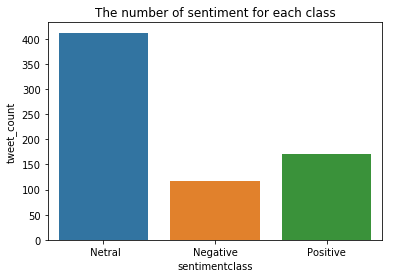

In [32]:
#make a barchar
ax = sns.barplot(x= 'sentimentclass', y='tweet_count', data=chart)
ax = ax.set_title('The number of sentiment for each class') 

##### Pie Chart

(-1.119625091672829,
 1.3102814027492418,
 -1.1074143922297166,
 1.122911464622866)

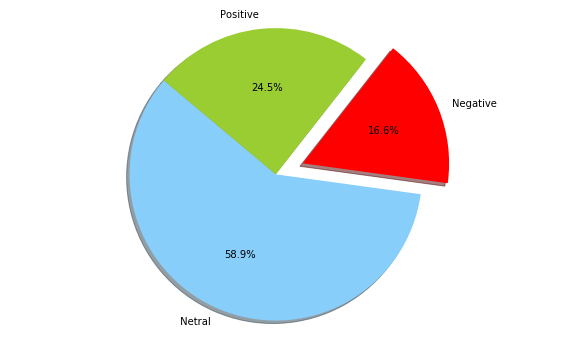

In [33]:
colors = [ 'lightskyblue','red','yellowgreen']
explode = (0, 0.2, 0)  # explode 1st slice
# Plot
figure = plt.figure(figsize= (10,6))
plt.pie(chart['tweet_count'], explode=explode, labels=chart['sentimentclass'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

## Sentiment Analysis

### Import Module

In [34]:
# !pip install wordcloud 
# !pip install -U tqdm

In [35]:
import pandas as pd 
import numpy as np 

# import nltk for natural language toolkit
import nltk 
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords


# import string, regex, , uniqcode
import re, string, unicodedata

# import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# import tqdm 
from tqdm import tqdm 

# import beaurtiful soup 
from bs4 import BeautifulSoup

# save model 
import pickle 

# textblob
from textblob import Word

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nirta.yunita07\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Data preparation

In [36]:
# import dataset 
dataset = pd.read_csv('trump_twitter.csv')
dataset.head()

,Unnamed: 0,text,sentiment,sentimentclass
0,0,good news see moscowmitch houseoversight 2 thi...,0.700000,Positive
1,1,liz20192020 combat veteran fulli support vetsf...,0.000000,Netral
2,2,growth slow 19 economi fall short targetbias f...,-0.150000,Negative
3,3,bmartin1776 circu go right bc lazi voter sat h...,0.285714,Positive
4,4,way republican attckd thedemocrat formal gop d...,-0.312500,Negative


In [37]:
#get text and response 
df = dataset[['text','sentimentclass']]
df.head()

,text,sentimentclass
0,good news see moscowmitch houseoversight 2 thi...,Positive
1,liz20192020 combat veteran fulli support vetsf...,Netral
2,growth slow 19 economi fall short targetbias f...,Negative
3,bmartin1776 circu go right bc lazi voter sat h...,Positive
4,way republican attckd thedemocrat formal gop d...,Negative


#### Preprocessing

##### Data cleansing

In [38]:
# cleansing 
def preprocessing(text):
    def strip_html(text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    def remove_between_square_brackets(text):
        return re.sub('-\[[^]]*\]', '', text)
    def denoise_text(text):
        text = strip_html(text)
        text = remove_between_square_brackets(text)
        return text
    def remove_punctuation(text):
        return re.sub(r'[^\w\s]', '', text)
    def remove_non_ascii(text):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_punctuation(text)
    text = remove_non_ascii(text)
    
    return text.lower()

In [39]:
# apply function 
df['text'] = df['text'].apply(preprocessing)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
# stopwords.words('indonesian')

##### Preprocessing

In [41]:
# stopword 
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
# lematization 
df['text']  = df['text'] .apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### Data exploration

In [43]:
# count sentiment 
sentiment = df.groupby(['sentimentclass'])['sentimentclass'].count()
sentiment

# make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['sentimentclass']
chart.drop(['sentimentclass'], axis = 1, inplace = True )
chart = chart.reset_index()

# make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,sentimentclass,tweet_count,percent
0,Netral,412,0.589413
1,Negative,116,0.165951
2,Positive,171,0.244635


*Barchart*

Text(0.5, 1.0, 'Sentiment Class')

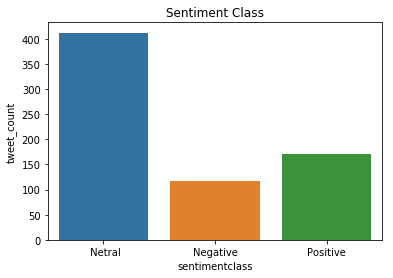

In [44]:
# visualization 
ax = sns.barplot(x= 'sentimentclass', y='tweet_count', data=chart)
ax.set_title('Sentiment Class')

*Wordcloud*

In [45]:
# define positive, neutral, and negative 
positive = df.loc[df['sentimentclass'] == "Positive"]
neutral = df.loc[df['sentimentclass'] == "Neutral"]
negative  = df.loc[df['sentimentclass'] == "Negative"]

In [46]:
# merge all the comments into one paragraph
all_text_positive = "".join(positive.text.values)
all_text_neutral = "".join(neutral.text.values)
all_text_negative = "".join(negative.text.values)

In [47]:
# text = happy.Description
# make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

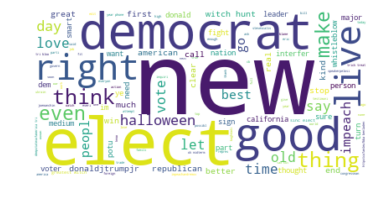

In [48]:
# positive
%matplotlib inline
create_word_cloud(all_text_positive)

In [51]:
all_text_neutral

''

In [49]:
# neutral
create_word_cloud(all_text_neutral)

ValueError: We need at least 1 word to plot a word cloud, got 0.

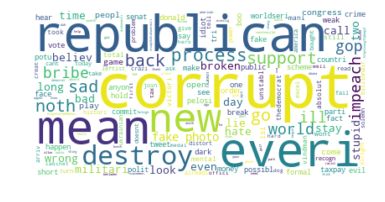

In [50]:
# neutral
create_word_cloud(all_text_negative)